# CA4

In this project we use a dataset of music information and train K-Nearest-Neighbor, Decision Tree and Random Forest classifiers to predict music genres. Also we study the effect of different preprocessing techniques and different hyperparameters on models accuracy.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#pip install category_encoders

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from math import sqrt

from sklearn.tree import DecisionTreeClassifier

import math   

# Phase 0 : EDA1 and Visualization

## 1. Study dataset structure

In [471]:
df = pd.read_csv("dataset.csv")
initial_df = pd.read_csv("dataset.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24341 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       24341 non-null  object 
 1   track_name        24341 non-null  object 
 2   popularity        24341 non-null  float64
 3   acousticness      24341 non-null  float64
 4   danceability      24341 non-null  float64
 5   duration_ms       24341 non-null  float64
 6   energy            24341 non-null  float64
 7   instrumentalness  24341 non-null  float64
 8   key               24341 non-null  object 
 9   liveness          24341 non-null  float64
 10  loudness          24341 non-null  float64
 11  mode              24341 non-null  object 
 12  speechiness       24341 non-null  float64
 13  tempo             24341 non-null  float64
 14  valence           24341 non-null  float64
 15  music_genre       24341 non-null  int64  
dtypes: float64(11), int64(1), object(4)
memo

In [472]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


In [473]:
numeric_cols = df.select_dtypes([np.number]).columns
categorical_cols = df.select_dtypes([np.object]).columns
print(categorical_cols)
print(numeric_cols)

Index(['artist_name', 'track_name', 'key', 'mode', 'music_genre'], dtype='object')
Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')


# 2. Percentage of missing values in each column

In [474]:
missing_values = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
for feature in missing_values:
    print(f"{feature}: {np.round(df[feature].isnull().mean()*100, 4)}% missing values")
    
#dataset.isnull().sum() * 100 / len(dataset)

artist_name: 4.98% missing values
duration_ms: 10.0333% missing values
tempo: 9.7767% missing values


## 3. Visualizing distributions of data

danceability has normal distribution.

instrumentalness, liveness, duration_ms and speechiness have right-skewed distribution.

loudness has left-skewed distribution.

acousticness, instrumentalness and energy have bimodal distribution.

valence has Truncated distribution.

popularity and tempo

### Distribution of numeric features:

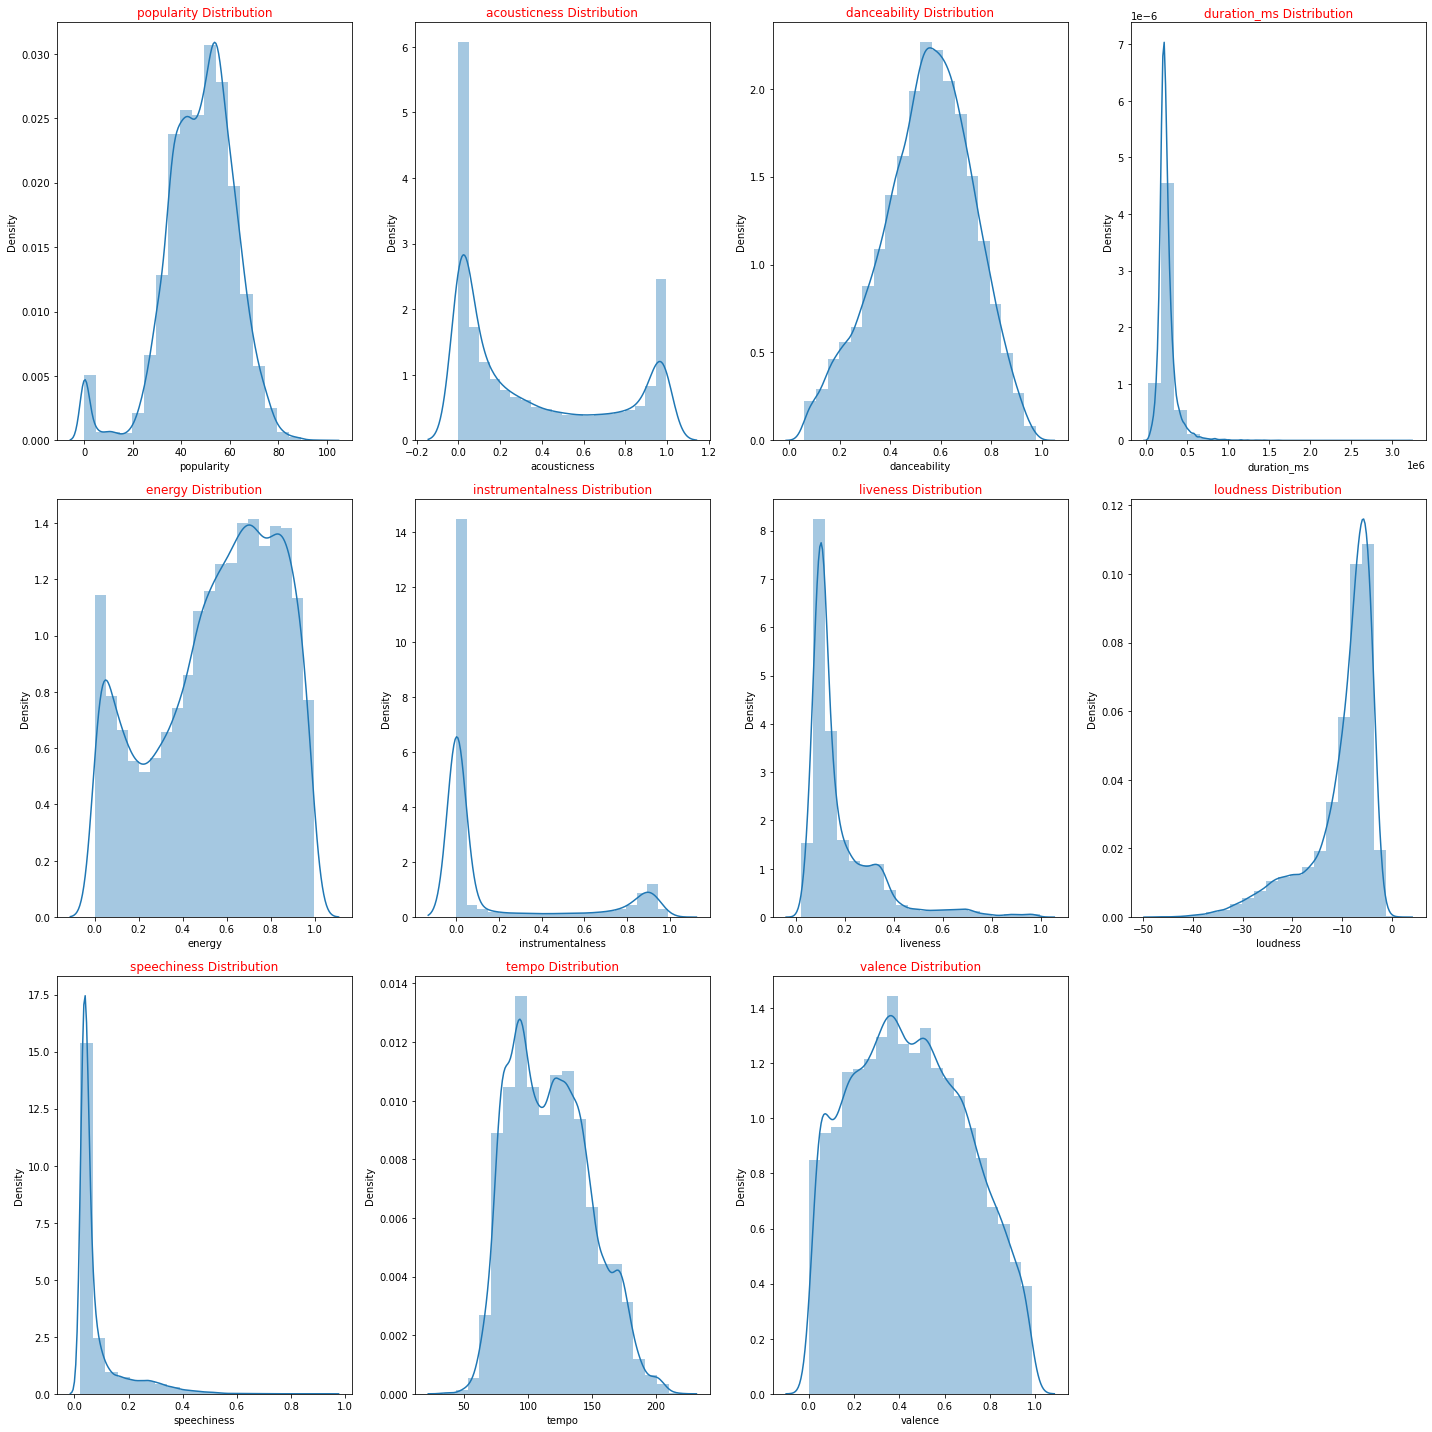

In [231]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(numeric_cols):
    ax=fig.add_subplot(3,4,i+1)
    sns.distplot(df[feature],ax=ax,bins=20)
    ax.set_title(feature+" Distribution",color='red')

fig.tight_layout()  
plt.show()

### Distribution of categorical features:

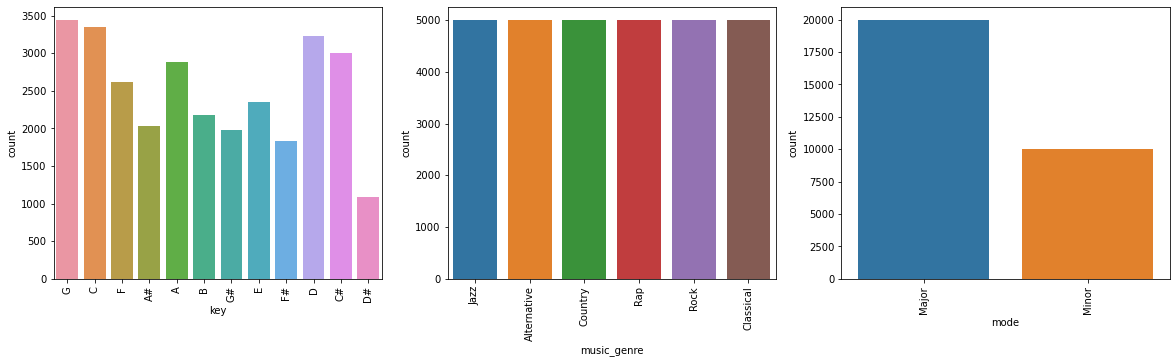

In [172]:
categorical = ['key','music_genre','mode']
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

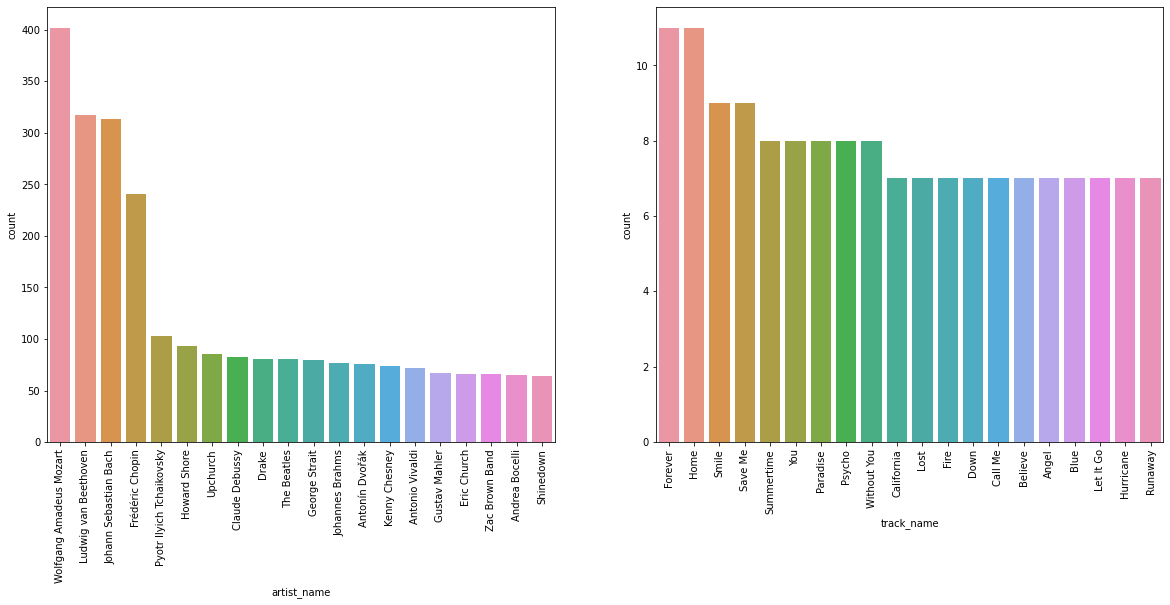

In [190]:
#df['artist_name']=df['artist_name'].str.replace('\$\$','\\$\\$')
#df['track_name']=df['track_name'].str.replace('\$\$','\\$\\$')
cols = ['artist_name','track_name']
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
for var, subplot in zip(cols, ax.flatten()):
    sns.countplot(data=df, x=var, order=df[var].value_counts().head(20).index,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        


### Distribution of numeric features in respect to target class(music_genre) :

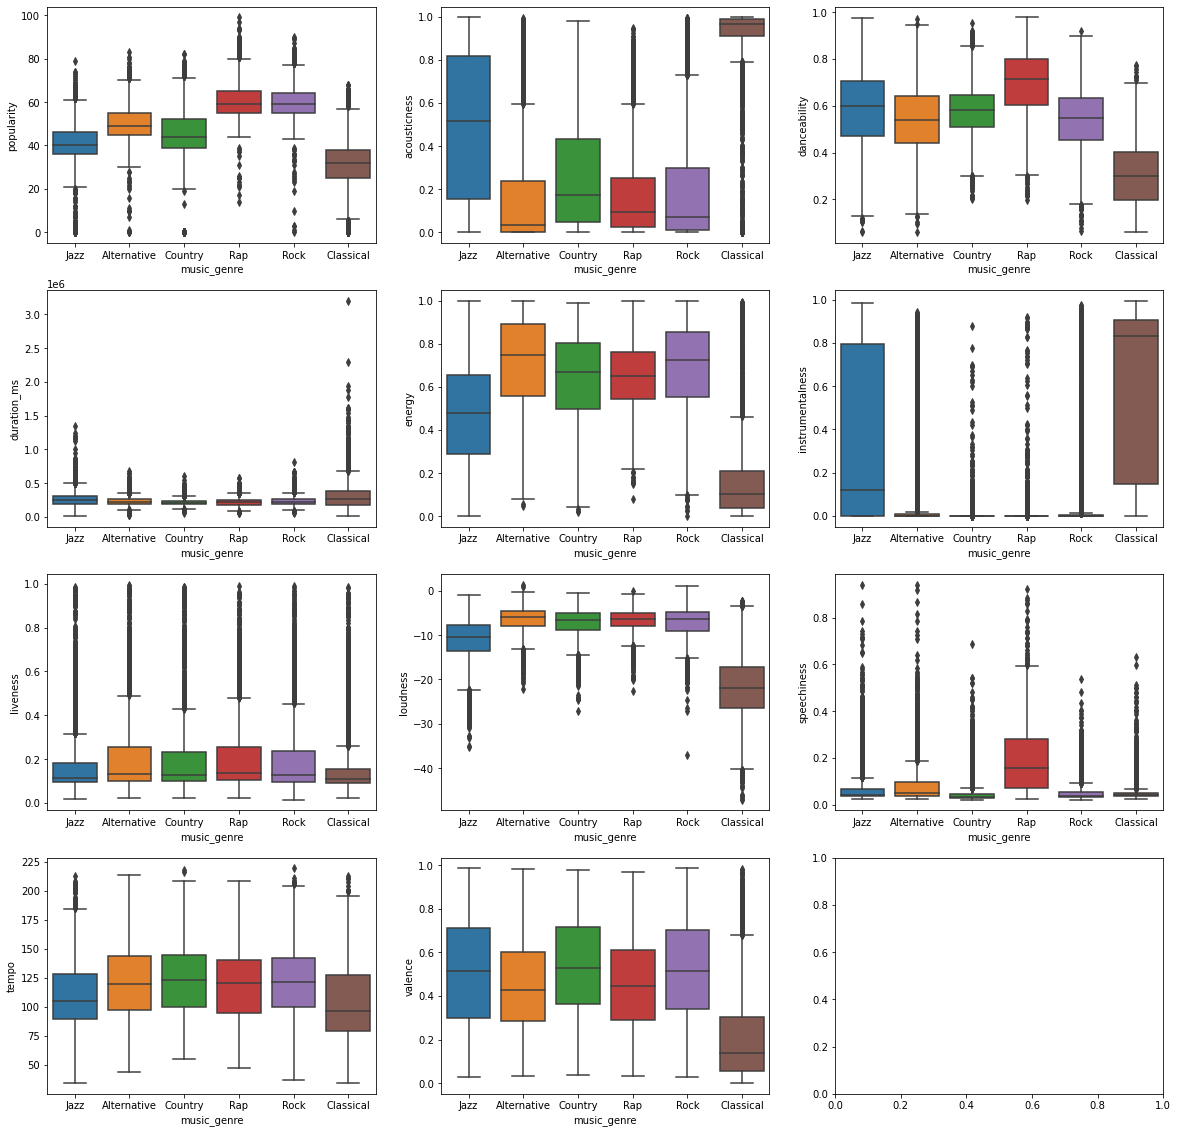

In [191]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for var, subplot in zip(numeric_cols, ax.flatten()):
    sns.boxplot(x='music_genre', y=var, data=df, ax=subplot)
    

### Distribution of categorical features in respect to target class(music_genre) :

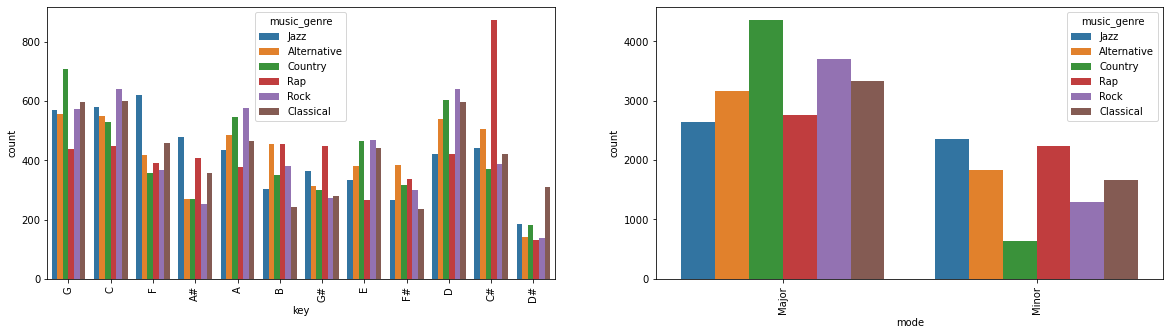

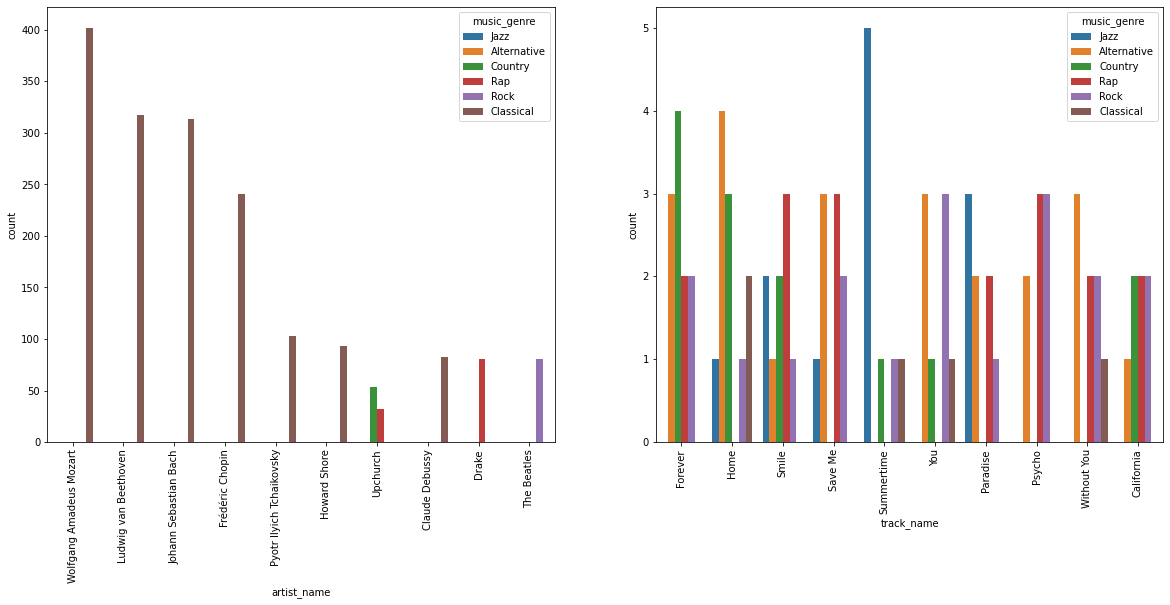

In [203]:
categorical = ['key','mode']
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot,hue = df['music_genre'])
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
cols = ['artist_name','track_name']
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
for var, subplot in zip(cols, ax.flatten()):
    sns.countplot(data=df, x=var, order=df[var].value_counts().head(10).index,ax=subplot,hue = df['music_genre'])
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Phase1:  Preprocessing


## 1. Handle missing values



    There are two primary ways to handle missing values:
       1.Deleting the missing values
       2.Imputing the missing values
        
   #### 1. Deleting the missing values:
        In this approach we delete the entire row or entire column if it has a misising value.
        Cons:
            Loss of information
        Pros:
            The model might be more accurate and robust(if the deleted row/column did not have any specific information)
    
#### 2. Imputing the misising values:
        In this approach we replace the missing values using one of the following methods.
* Mean/Median/Mode
            Mean is more apporpriate when there are not many outliers. Median works better in case of outliers.
            We can us emode for categorical data.
            Pros:
                Easy and fast
                Can reduce bias by using all data to estimate missing data
            Cons:
                Distorts the distribution(changes the variance).Values that are imputed by a variable’s mean have zero
                correlation with other variables
         
* Prediction(Regression for numeric data and classification for categorical data)
             In this approach the information of other variables is used to predict the missing values.This methos is good 
             when there is a strong correlation between the missing value and other variables.
             Pros:
                 Can reduce bias by using all date to predict missing values
                 Increase accuracy
             Cons:
                 Underestimates variance
                 Distorts the distribution
                 
* Assigning an unique category
              Appropriate for categorical data.
              Pros:
                  No inforamtion loss
              Cons:
                  Poor performance since a new feature is added
                  Change variance       
            


## 2. 

    According to plots of previous part, artist name seems to be an important feature to predict music genre, so we use 
    mode to replace this column missing values. But tempo and duration does not seem to be significan features thus we 
    delete missing values of these features to help the model to be more accurate and robust.
    

In [475]:
def drop_misisngValues(dataset,cols_list):
    dataset = dataset.dropna(subset=cols_list)
    return dataset
def replace_with_mode(dataset,cols_list):
    for col in cols_list:
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
    return dataset

#df =  drop_misisngValues(df,["tempo","duration_ms"])
df = replace_with_mode(df,["artist_name"])
#df = replace_with_mode(df,["tempo","duration_ms"])
#df =  drop_misisngValues(df,["artist_name"])
df =  drop_misisngValues(df,["tempo"])
df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].mean())
df.isnull().sum()

artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

## 3. Normalization and Standardization

#### Normalization: 
    Normalization is used to change the values of numeric columns in the dataset to a common scale, without 
    distorting differences in the ranges of values. We use this method because, when a model relies on the  
    magnitude of values(such as knn), a column with higher range will have higher influence on result while 
    it is not necessarily more important than other features.             
    Normalization is good to use when we don’t know about the distribution or when we know distribution is not Gaussian.
    This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural 
    Networks.
    (X - X_{min})/(X_{max} - X_{min})


    
#### Standardization:
    Standardization is the process of rescaling one or more attributes so that they have a mean value of 0 
    and a standard deviation of 1. It is done by subtracting from mean and dividing by standard deviation.
    Standardization is used when we want to compare measurements that have different units. Because, 
    Variables with different scales do not contribute equally to the analysis and might 
    end up creating a bais.
    (x −μ)/σ

                     

## 4. Data scaling
    Distance algorithms like KNN are most affected by the range of features. This is because they use distances between 
    data points to determine their similarity. When features have different scales, there is a chance that higher weightage 
    is given to features with higher magnitude and therefore model will be biassed towards one feature.
    Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Decision tree is only 
    splitting a node based on a single feature. The split on one feature is not influenced by other features.
    Normalization and Standardization are two feature scaling techniques. 
    At first, we used standardization for danceability and normalization for other features because they did not have 
    normal dirtibution, but KNN accuracy was too low. So we scaled data once again using standardization and we got better 
    results.

In [476]:
cols_to_norm = ['valence', 'tempo','loudness','liveness','instrumentalness','energy','duration_ms','popularity','acousticness','speechiness',]

def normalization(dataset, cols_to_norm):
    for col in cols_to_norm:
        dataset[col] = MinMaxScaler().fit_transform(np.array(dataset[col]).reshape(-1,1))
    return dataset
    
def standardization(dataset, cols_to_standardize):
    for col in cols_to_standardize:
        dataset[col] = StandardScaler().fit_transform(np.array(dataset[col]).reshape(-1,1))
    return dataset

#df = normalization(df, cols_to_norm)
df = standardization(df,['danceability'])
df = standardization(df,cols_to_norm)
df.head(2)

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",-0.260330,-0.972134,0.932085,0.364102,0.233048,-0.459322,G,-0.162579,0.38248,Major,-0.489893,0.797711,0.641856,Jazz
1,FloFilz,Corners,-0.948102,-0.036206,1.031054,-1.329669,-0.148643,-0.528383,C,-0.375382,-0.00880,Major,1.068768,-1.223685,-0.643595,Jazz


## 5. Handle categorical data

* Count / Frequency Encoding : 
        In this approach each category is replace by its frequency/number of time that category occurred in that column.
        
* Giving numbers:
        A number is assigned to each category. When variables are nominal, by converting them to simple 
        numbers, we are creating an artificial order which is not genuine.
        
    
We use integer encoding for music_genre, key, track_name and artist_name and one hot encoding for mode.
        

In [477]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce


def frequency_encoding(dataset, col_names):
    for col in col_names:
        fq = df.groupby(col).size()/len(df)  
        dataset.loc[:, "{}_freq_encode".format(col)] = dataset[col].map(fq) 
        dataset = dataset.drop([col], axis = 1)
    return dataset

def one_hot_encoding(dataset,col_names):
    for col in col_names:
        encoded = ce.OneHotEncoder().fit_transform(dataset[col])
        dataset.drop([col], axis=1, inplace=True)
        dataset = dataset.join(encoded)
    return dataset

def label_encodeing(dataset,col_names):
    for col in col_names:
        label_encoder = LabelEncoder()
        dataset[col] = label_encoder.fit_transform(dataset[col])
    return dataset


label_encoder = LabelEncoder()
encodedLabels = label_encoder.fit_transform(df["music_genre"])
targetLabel_map = dict(zip(df["music_genre"], encodedLabels))
df["music_genre"] = encodedLabels

df =  label_encodeing(df,["key","track_name","artist_name"])
df = one_hot_encoding(df,["mode"])


#df = normalization(df, ["artist_name","track_name","key","mode_1","mode_2"])
df = standardization(df, ["artist_name","track_name","key","mode_1","mode_2"])

df.head(2)

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_1,mode_2
0,-1.387411,-1.207413,-0.260330,-0.972134,0.932085,0.364102,0.233048,-0.459322,1.341173,-0.162579,0.38248,-0.489893,0.797711,0.641856,3,0.71097,-0.71097
1,-0.743701,-1.127770,-0.948102,-0.036206,1.031054,-1.329669,-0.148643,-0.528383,-0.685762,-0.375382,-0.00880,1.068768,-1.223685,-0.643595,3,0.71097,-0.71097


In [ ]:
categorical = ['key','mode_1','mode_2','artist_name','track_name']
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(categorical):
    ax=fig.add_subplot(3,4,i+1)
    sns.distplot(df[feature],ax=ax,bins=20)
    ax.set_title(feature+" Distribution",color='red')

fig.tight_layout()  
plt.show()

## 6.
 In order to use this feature we have to convert its categorical values to numeric values. One hot encoding is one of the best techniques to handle nominal variables since it does not impose any ordinal relationship. But artist_name column has 5000 different variables, using one hot encoding we have to add 5000 columns to the dataset. This creates problems of sparse and large vectors. So we used integer encoding to handle this feature.

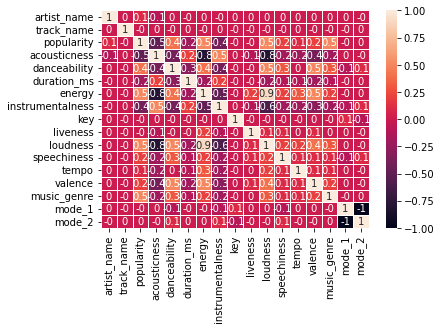

In [358]:
matrix = df.corr().round(1)
sns.heatmap(matrix, annot=True, linewidths=1)
plt.show()

## 7. Information Gain 

In [549]:
from sklearn.feature_selection import mutual_info_classif
x_data = df.copy().drop(columns = "music_genre")
y_data = df["music_genre"]
mutual_info = mutual_info_classif(x_data, y_data)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_data.columns
mutual_info.sort_values(ascending=False)

artist_name         1.164453
popularity          0.504428
acousticness        0.354454
loudness            0.345728
energy              0.324110
track_name          0.309598
instrumentalness    0.294039
danceability        0.279096
speechiness         0.216763
valence             0.137837
duration_ms         0.106989
tempo               0.103752
mode_2              0.038914
mode_1              0.034998
key                 0.019976
liveness            0.012370
dtype: float64

<AxesSubplot:>

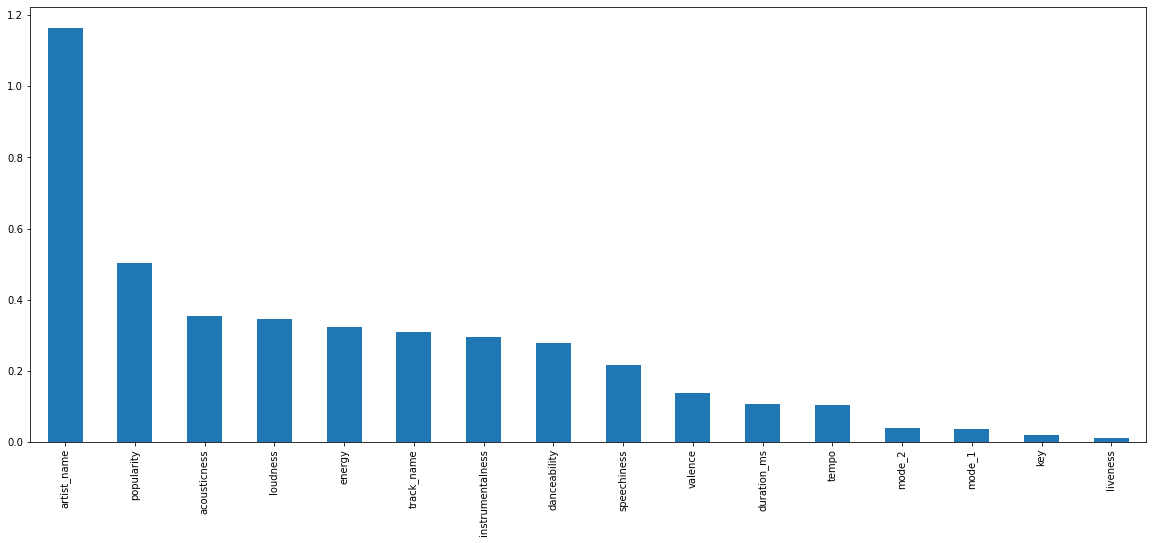

In [550]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# 8. Feature selection:

By keeping all the features, we can be sure that no valuable inforamtion is lost. On the other hand, keeping irrelevent
attributes can result in overfitting and keeping redundant attributes can mislead the model. Moreover, having too many columns in a dataset results in high memory consumption and lower speed.

* We can drop columns which have low inforamtin gain such as liveness and key. 
    
    
* Features with high correlation are more linearly dependent and have almost the same effect on the target. So,we can 
    drop one of the two features in order to make model more stable and simple. As we can see in the correlation matrix 
    heatmap, energy and loudness have correlation coefficient near to 1, so we can drop one of them.

In [451]:
def drop_columns(dataset, col_names):
    for col in col_names:
        dataset.drop(col, inplace=True, axis=1)
    return dataset

df = drop_columns(df,['key','liveness','mode_1','mode_2','tempo'])

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24341 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       24341 non-null  object 
 1   track_name        24341 non-null  object 
 2   popularity        24341 non-null  float64
 3   acousticness      24341 non-null  float64
 4   danceability      24341 non-null  float64
 5   duration_ms       24341 non-null  float64
 6   energy            24341 non-null  float64
 7   instrumentalness  24341 non-null  float64
 8   key               24341 non-null  object 
 9   liveness          24341 non-null  float64
 10  loudness          24341 non-null  float64
 11  mode              24341 non-null  object 
 12  speechiness       24341 non-null  float64
 13  tempo             24341 non-null  float64
 14  valence           24341 non-null  float64
 15  music_genre       24341 non-null  int64  
dtypes: float64(11), int64(1), object(4)
memo

# Phase2:  Model Training, Evaluation and Hyper Parameter Tuning


## 1. Split data
The optimum split percentage depends on the data.

* More training data means model sees more examples and thus finds a better solution. But with less training data, the parameter estimates have a higher variance.

* It is important that test set represents most of the variance in the dataset. Less testing data leads to high variance in 
performance measures.

For large data sets any division may work fine but when the data set is limited, division ratio may play a crucial role.
For example, for a large data sets P=70 is a good starting point. But for a smaller data set, since each observation is extremely valuable, we have to choose higher P. 

#### Random split
Data might be sorted by some feature or it might have autocorrelation(value at a point is similar to values around it). So random split is needed to ensure that the train and test datasets are representative of the original dataset. Otherwise, 
train and test splits might end up being biased.

#### Stratify
The proportions of the target variable must be same among train and test set in order to represent the true distribution of 
the data. No class should be oversampled or undersampled in the test and train sets. For eaxmple in both test and train sets, each genre must have almost 16 percent of the data.

Stratified sampling partition the data in a way that the resulting object category distribution is balanced.
It is done by dividing the population into subgroups or into strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the entire population.
As we can see in this datset, When the data set has a large amount of each class and they are balanced, stratified sampling is pretty much the same as random sampling. 


In [267]:
 from sklearn.model_selection import train_test_split
df["music_genre"].value_counts()/df["music_genre"].value_counts().sum()*100

5    16.839900
3    16.696109
0    16.642702
2    16.634485
4    16.605727
1    16.581077
Name: music_genre, dtype: float64

# 2.

#### Splitting with Stratification

In [478]:
X = df.drop(columns=["music_genre"])
y = df["music_genre"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1,stratify=y) 

In [479]:
y_train.value_counts()/y_train.value_counts().sum()*100

5    16.847550
3    16.704383
4    16.639727
1    16.625872
0    16.607399
2    16.575070
Name: music_genre, dtype: float64

In [480]:
y_test.value_counts()/y_test.value_counts().sum()*100

5    16.863687
3    16.697451
4    16.642039
1    16.623569
0    16.605098
2    16.568157
Name: music_genre, dtype: float64

# 3. K Nearest Neighbors

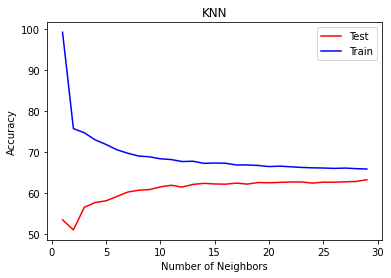

Max accuracy is  63.20650166235685 and is achived with k =  29


In [500]:
def K_Nearest_Neighbors(depths):
    
    trainScores, testScores= [], []
    bestK = 0
    maxAcc = float('-inf')
    for i in depths:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn = knn.fit(X_train, y_train)
        test_pred = knn.predict(X_test)
        train_pred = knn.predict(X_train)
        testAcc = metrics.accuracy_score(y_test,test_pred)*100
        testScores.append(testAcc)
        trainScores.append(metrics.accuracy_score(y_train,train_pred)*100)
        if testAcc > maxAcc:
            maxAcc = testAcc 
            bestK = i
     
    plt.plot(depths, testScores, label='Test', color='red')
    plt.plot(depths, trainScores, label='Train', color='blue')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of Neighbors')
    plt.title('KNN')
    plt.legend()
    plt.show()
    return maxAcc, bestK
   
    

depths = list(range(1,30))
maxAccuracy, bestK = K_Nearest_Neighbors(depths)
print("Max accuracy is ",maxAccuracy, "and is achived with k = ",bestK)


# 4. Decision Tree

In [501]:
def tuneDecisionTreeParams(min_samples_leafs=[1], depths=[10], mode = "max_depth"):
    minSamples , bestDepth = 0,0
    maxAcc = float('-inf')
    scoresDict = {}
    trainScores, testScores= [], []
    for i in range(0,len(depths)):
        testscore= []
        for min_samples_leaf in min_samples_leafs:
            tree = DecisionTreeClassifier(max_depth = depths[i], min_samples_leaf=min_samples_leaf)
            tree = tree.fit(X_train, y_train)
            test_pred = tree.predict(X_test)
            train_pred = tree.predict(X_train)
            trainScores.append(metrics.accuracy_score(y_train,train_pred)*100)
            testAcc =  metrics.accuracy_score(y_test,test_pred)*100
            testScores.append(testAcc)
            testscore.append(testAcc)
            if testAcc > maxAcc:
                maxAcc = testAcc 
                minSamples = math.ceil(min_samples_leaf * X_train.size)
                bestDepth = depths[i]
            scoresDict[depths[i]] = testscore
           
    if mode == "min_samples_leafs":
        min_samples_leafs = [ math.ceil(min_samples_leaf * X_train.size) for min_samples_leaf in min_samples_leafs ]
        plt.plot(min_samples_leafs, testScores, label='Test', color='red' )
        plt.plot(min_samples_leafs, trainScores, label='Train',  color='blue')
        
    elif mode == "max_depth":
        plt.plot(depths, testScores, label='Test', color='red' )
        plt.plot(depths, trainScores, label='Train',  color='blue')
        
    else:
        min_samples_leafs = [ math.ceil(min_samples_leaf * X_train.size) for min_samples_leaf in min_samples_leafs ]
        colors = ['red','green','blue','yellow','orange']
        for i in range(0,len(depths)):
            plt.plot(min_samples_leafs,scoresDict[depths[i]], label=f'max_depth {depths[i]}' , color=colors[i] )
       
    plt.ylabel('Accuracy')
    plt.xlabel(mode)
    plt.title('Decision Tree')
    plt.legend()
    plt.show()
    return maxAcc, minSamples, bestDepth


##### Tune min_samples_leaf:

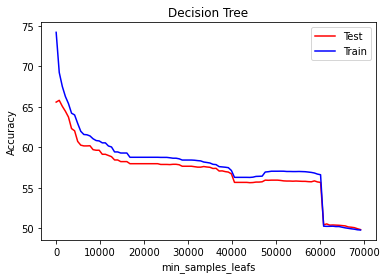

Max accuracy is  65.81086073143702 and is achived with min_samples_leaf =  701


In [502]:
min_samples_leafs = np.linspace(1e-06, 0.2, 100, endpoint=True)
maxAccuracy, minSamples,_ = tuneDecisionTreeParams(min_samples_leafs=min_samples_leafs,mode="min_samples_leafs")
print("Max accuracy is ",maxAccuracy, "and is achived with min_samples_leaf = ", minSamples)

##### Tune max_depth:

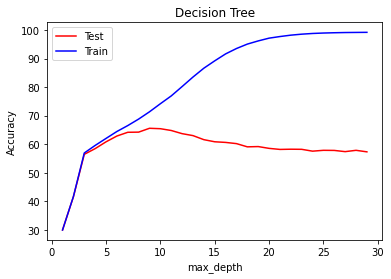

Max accuracy is  65.60768378278537 and is achived with depth =  9


In [503]:
depths = list(range(1,30))
maxAccuracy,_, bestDepth = tuneDecisionTreeParams(depths=depths ,mode="max_depth")
print("Max accuracy is ",maxAccuracy, "and is achived with depth = ",bestDepth)

##### Max-depth and min samples leafs

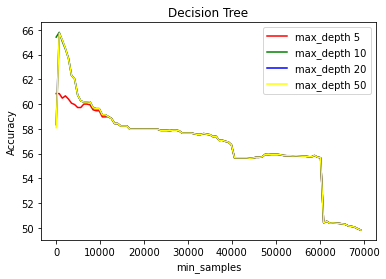

In [504]:
min_samples_leafs = np.linspace(1e-06, 0.2, 100, endpoint=True)
depths = [5,10,20,50]
maxAccuracy,minSamples, bestDepth = tuneDecisionTreeParams(min_samples_leafs=min_samples_leafs,depths=depths ,mode="min_samples")


# 5. Underfitting and Overfitting

### Underfitting:
    Underfitting happens when model is not complex enough to accurately capture relationships between a dataset’s features 
    and a target variable. An underfitted model results in problematic or erroneous outcomes on new data and often performs 
    poorly even on training data.
    
### Overfitting:
    Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively 
    impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data 
    is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and 
    negatively impact the models ability to generalize.
    An overfitted model will be less accurate on new data, but appear to have a high accuracy on the training data.
    
#### Overfitting and underfitting in K-Nearest-Neighbors:
    It can be observed from the KNN plot that too low value of k leads to overfitting and too big value of k leads to  
    underfitting.
    For k = 1 we get 99.1% accuracy on train set and 50% accuray on test set, the high accuracy on train set and low 
    accuracy on test shows the model is overfitted. As K becomes larger, the classification decision boundary becomes 
    smoother. So the accuray on train set decreases and since the model is more generalized we get higher accuray on test 
    set. But, for k > 17 the accuracy on test set drops, which indicates undefitting has happend.
    

#### Overfitting and underfitting in Desicion Tree:
    It can be observed from the plot taht high depth leads to overfitting because with high depth the tree ends up having 
    branches with strict rules of sparse data. To prevent overfitting we can use pruning or early stopping.
    At very low depths, undertraining and lack of complexity results in underfitting.
    For depth = 8 we get highest accuray on test set after that the accuracy drops due to overfitting.
    
    For min sample leafs we can see that the with large number of samples at each leaf, the model performs poorly on test 
    and train sets because of underfitting.

# 6. Evaluating models
* Accuracy represents the number of correctly classified data instances over the total number of data instances.
            Accuracy = TP+TN/TP+FP+FN+TN
    
* Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
            Precision = TP/TP+FP
    
* Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
            Recall = TP/TP+FN
    
* F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 
    negatives into account
            F1 Score = 2*(Recall * Precision) / (Recall + Precision)

##### KNN

In [505]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
knn = KNeighborsClassifier(n_neighbors=bestK)
knn = knn.fit(X_train, y_train)
ytest_pred = knn.predict(X_test)
ytrain_pred = knn.predict(X_train)
#precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Test set\n",classification_report(y_test, ytest_pred, target_names = targetLabel_map.keys()))
print("\n\nTrain set\n",classification_report(y_train, ytrain_pred, target_names = targetLabel_map.keys()))


Test set
               precision    recall  f1-score   support

        Jazz       0.44      0.37      0.41       899
 Alternative       0.89      0.87      0.88       900
     Country       0.51      0.67      0.58       897
         Rap       0.71      0.55      0.62       904
        Rock       0.74      0.76      0.75       901
   Classical       0.53      0.57      0.55       913

    accuracy                           0.63      5414
   macro avg       0.64      0.63      0.63      5414
weighted avg       0.64      0.63      0.63      5414



Train set
               precision    recall  f1-score   support

        Jazz       0.50      0.43      0.46      3596
 Alternative       0.89      0.87      0.88      3600
     Country       0.54      0.69      0.61      3589
         Rap       0.75      0.59      0.66      3617
        Rock       0.71      0.75      0.73      3603
   Classical       0.59      0.61      0.60      3648

    accuracy                           0.66     21653


##### Decision Tree

In [506]:
tree = DecisionTreeClassifier(max_depth = 9)
tree = tree.fit(X_train, y_train)
tree_ytest_pred = tree.predict(X_test)
tree_ytrain_pred = tree.predict(X_train)
print("Test set: \n",classification_report(y_test, tree_ytest_pred, target_names = targetLabel_map.keys()))
print("\n\nTrain set:\n",classification_report(y_train, tree_ytrain_pred, target_names = targetLabel_map.keys()))

Test set: 
               precision    recall  f1-score   support

        Jazz       0.50      0.40      0.44       899
 Alternative       0.90      0.87      0.88       900
     Country       0.61      0.55      0.58       897
         Rap       0.67      0.65      0.66       904
        Rock       0.75      0.76      0.75       901
   Classical       0.53      0.71      0.60       913

    accuracy                           0.66      5414
   macro avg       0.66      0.66      0.65      5414
weighted avg       0.66      0.66      0.65      5414



Train set:
               precision    recall  f1-score   support

        Jazz       0.59      0.47      0.52      3596
 Alternative       0.93      0.90      0.92      3600
     Country       0.67      0.61      0.64      3589
         Rap       0.76      0.74      0.75      3617
        Rock       0.78      0.79      0.79      3603
   Classical       0.57      0.77      0.66      3648

    accuracy                           0.71     216

# 7. Impact of preprocessing on accuracy

In [507]:
def runModels(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=15)
    knn = knn.fit(X_train, y_train)
    ytest_pred = knn.predict(X_test)
    ytrain_pred = knn.predict(X_train)
    print("KNN:")
    print("\tAccuracy on test set = ",metrics.accuracy_score(y_test, ytest_pred))
    print("\tAccuracy on train set = ",metrics.accuracy_score(y_train, ytrain_pred))

    tree = DecisionTreeClassifier(max_depth = 8)
    tree = tree.fit(X_train, y_train)
    tree_ytest_pred = tree.predict(X_test)
    tree_ytrain_pred = tree.predict(X_train)
    print("\nDecision Tree:")
    print("\tAccuracy on test set = ",metrics.accuracy_score(y_test, tree_ytest_pred))
    print("\tAccuracy on train set = ",metrics.accuracy_score(y_train, tree_ytrain_pred))

#### 1.Drop all columns with NaN

In [508]:
newdf = initial_df.copy()
standardizing_columns = ['valence', 'tempo','loudness','liveness','instrumentalness',
                         'energy','duration_ms','popularity','acousticness','speechiness','danceability','track_name','artist_name']

newdf = newdf.dropna(subset=['artist_name','tempo','duration_ms'])
newdf =  label_encodeing(newdf,["key","track_name","artist_name"])
newdf = standardization(newdf,standardizing_columns)
newdf = drop_columns(newdf,['key','liveness','mode','tempo','energy'])
X = newdf.drop(columns=["music_genre"])
y = newdf["music_genre"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1,stratify=y) 

runModels(X_train, X_test, y_train, y_test)


KNN:
	Accuracy on test set =  0.6430423509075195
	Accuracy on train set =  0.6921123716909778

Decision Tree:
	Accuracy on test set =  0.6404494382022472
	Accuracy on train set =  0.6812533765532145


#### 2. No standardization

In [509]:
newdf = initial_df.copy()
newdf = handleCategoricalDat(newdf)
newdf =  drop_misisngValues(newdf,["tempo","duration_ms"])
newdf = replace_with_mode(newdf,["artist_name"])
newdf =  label_encodeing(newdf,["key","track_name","artist_name"])
newdf = drop_columns(newdf,['key','liveness','mode','tempo','energy'])
X = newdf.drop(columns=["music_genre"])
y = newdf["music_genre"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1,stratify=y) 
runModels(X_train, X_test, y_train, y_test)


KNN:
	Accuracy on test set =  0.270486752926679
	Accuracy on train set =  0.36549917830731304

Decision Tree:
	Accuracy on test set =  0.634216471554734
	Accuracy on train set =  0.6887325390304027


#### 3. Keep all columns

In [510]:
newdf = initial_df.copy()
standardizing_columns = ['valence', 'tempo','loudness','liveness','instrumentalness',
                         'energy','duration_ms','popularity','acousticness','speechiness','danceability','track_name','artist_name']
newdf =  drop_misisngValues(newdf,["tempo","duration_ms"])
newdf = replace_with_mode(newdf,["artist_name"])
newdf =  label_encodeing(newdf,["key","track_name","artist_name","mode"])
newdf = standardization(newdf,standardizing_columns)
X = newdf.drop(columns=["music_genre"])
y = newdf["music_genre"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1,stratify=y) 
runModels(X_train, X_test, y_train, y_test)

KNN:
	Accuracy on test set =  0.59211337030191
	Accuracy on train set =  0.6683956450287593

Decision Tree:
	Accuracy on test set =  0.636270281371945
	Accuracy on train set =  0.6922760887428102


In [513]:
df.head(10)

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_1,mode_2
0,-1.387411,-1.207413,-0.260330,-0.972134,0.932085,0.364102,0.233048,-0.459322,1.341173,-0.162579,0.382480,-0.489893,0.797711,0.641856,3,0.710970,-0.710970
1,-0.743701,-1.127770,-0.948102,-0.036206,1.031054,-1.329669,-0.148643,-0.528383,-0.685762,-0.375382,-0.008800,1.068768,-1.223685,-0.643595,3,0.710970,-0.710970
3,0.377135,-1.659686,-0.604216,1.531960,-0.316027,-0.167898,-1.753545,-0.549152,0.762049,-0.295580,-0.785456,-0.528378,-1.134555,-0.968975,3,0.710970,-0.710970
4,0.157766,0.689703,-0.810547,-0.894440,-0.376508,0.892628,0.960421,0.802744,1.341173,0.814985,0.498222,-0.224771,-0.418818,-0.257960,3,0.710970,-0.710970
5,0.766514,0.483297,0.358664,0.386732,2.086725,-0.883378,-1.045256,-0.143124,-1.264886,-0.495083,-0.383380,1.378790,0.178492,1.260479,3,-1.406529,1.406529
7,-0.954158,1.209911,1.046436,0.930509,0.211809,0.327055,-0.926428,-0.537659,-1.264886,-0.684611,-0.423832,-0.610694,-0.798285,-0.334283,3,0.710970,-0.710970
8,0.492989,-0.909801,-1.085656,1.111768,0.849610,0.000000,0.218645,1.424227,-1.554448,-0.475133,0.304166,-0.580761,0.467594,0.091522,3,-1.406529,1.406529
9,1.508254,-0.472416,-0.604216,0.370254,0.629679,0.213694,-0.850810,-0.363220,-0.975324,-0.711211,-0.745003,-0.526240,-0.852616,0.505277,3,-1.406529,1.406529
11,-0.069143,-0.502192,-0.948102,-0.645895,0.151328,-0.884548,1.129661,2.157881,-1.554448,1.420144,0.873378,0.544938,-0.864530,0.212033,3,-1.406529,1.406529
12,-1.037107,1.292300,-0.672993,-0.987008,1.141020,0.766982,0.369880,1.475765,1.630736,3.355322,0.173452,-0.334882,-0.779861,-0.507016,3,-1.406529,1.406529


# Phase3: Ensemble Methods

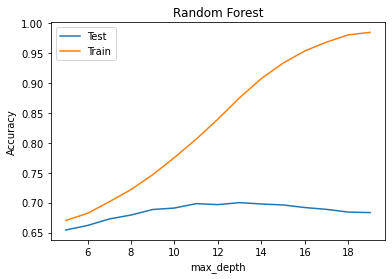

Max accuracy is  65.81086073143702 and is achived with max_depth  =  13 




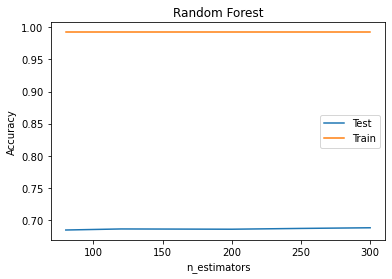

Max accuracy is  65.81086073143702 and is achived with n_estimators  =  300 




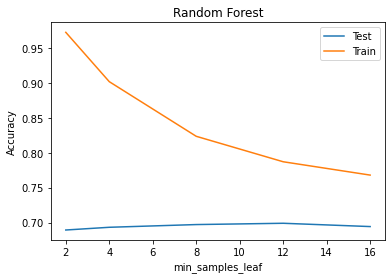

Max accuracy is  65.81086073143702 and is achived with min_samples_leaf  =  12 




In [516]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
def tuenRandomForestClassifier(param_list,parameter):
    trainScores, testScores= [], []
    bestIndex = 0
    maxAcc = float('-inf')
    for i in range(0,len(param_list)):
        if parameter=="max_depth" : RF = RandomForestClassifier(max_depth=param_list[i])
        if parameter=="n_estimators": RF = RandomForestClassifier(n_estimators=param_list[i])
        if parameter=="min_samples_leaf": RF = RandomForestClassifier(min_samples_leaf=param_list[i])
        RF = RF.fit(X_train, y_train)
        test_predict = RF.predict(X_test)
        train_predict = RF.predict(X_train)
        testScores.append(metrics.accuracy_score(y_test, test_predict))
        trainScores.append(metrics.accuracy_score(y_train, train_predict))
        if metrics.accuracy_score(y_test, test_predict) > maxAcc:
            maxAcc = metrics.accuracy_score(y_test, test_predict)
            bestIndex = i
   
    plt.plot(param_list, testScores, label='Test')
    plt.plot(param_list, trainScores, label='Train')
    plt.ylabel('Accuracy')
    plt.xlabel(parameter)
    plt.title('Random Forest')
    plt.legend()
    plt.show()
    print("Max accuracy is ",maxAccuracy, "and is achived with", parameter," = ",param_list[bestIndex],"\n\n")


tuenRandomForestClassifier(list(range(5,20)), parameter="max_depth")
tuenRandomForestClassifier([80,120,200,250,300], parameter="n_estimators")
tuenRandomForestClassifier([2,4,8,12,16], parameter="min_samples_leaf")

In [468]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[100,250,300,450,500],
    "max_depth":[8,12,16,18]
    
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
display(cv)



Best parameters are: {'max_depth': 12, 'n_estimators': 300}


0.685 + or -0.007 for the {'max_depth': 8, 'n_estimators': 100}
0.688 + or -0.006 for the {'max_depth': 8, 'n_estimators': 250}
0.686 + or -0.006 for the {'max_depth': 8, 'n_estimators': 300}
0.686 + or -0.006 for the {'max_depth': 8, 'n_estimators': 450}
0.687 + or -0.007 for the {'max_depth': 8, 'n_estimators': 500}
0.702 + or -0.004 for the {'max_depth': 12, 'n_estimators': 100}
0.703 + or -0.004 for the {'max_depth': 12, 'n_estimators': 250}
0.704 + or -0.004 for the {'max_depth': 12, 'n_estimators': 300}
0.703 + or -0.003 for the {'max_depth': 12, 'n_estimators': 450}
0.703 + or -0.005 for the {'max_depth': 12, 'n_estimators': 500}
0.696 + or -0.002 for the {'max_depth': 16, 'n_estimators': 100}
0.7 + or -0.003 for the {'max_depth': 16, 'n_estimators': 250}
0.699 + or -0.002 for the {'max_depth': 16, 'n_estimators': 300}
0.699 + or -0.002 for the {'max_depth': 16, 'n_estimators': 450}
0.7 + or -0.004 for the {'max_depth

## 2. Random Forest Hyperparameters

##### max_depth :
  The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node
  As the max_depth value increases, the performance over the test set increases initially but after a certain point, it     
  starts to decrease rapidly.Because, the tree starts to overfit the training set and therefore is not able to generalize 
  over the unseen points in the test set.

##### n_estimators:
 n_estimator parameter controls the number of trees inside the classifier. Using many trees will help to get a more  
 generalized result and it will not cause any overfitting, but can certainly increase the time complexity of the model. 
 In this graph, we can clearly see that the performance of the model sharply increases and then stagnates at a certain  
 level.

##### mean_samples_leaf : 
 This hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a  
 node.The larger values of mean_samples_leaf help to reduce overfitting, since it controlles the growth of the tree. But 
 increasing the value to a large number can lead to less number of parameters causing the model to underfit.

## 3.

In [518]:

RF = RandomForestClassifier(bootstrap=True,max_depth=21,n_estimators=300, min_samples_leaf=5,min_samples_split=2)
RF = RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)
train_predict = RF.predict(X_train)
print("Test set\n",classification_report(y_test, y_predict,target_names = targetLabel_map.keys()))
print("\n\nTrain set\n",classification_report(y_train, train_predict, target_names = targetLabel_map.keys()))

Test set
               precision    recall  f1-score   support

        Jazz       0.60      0.39      0.47       810
 Alternative       0.92      0.90      0.91       807
     Country       0.70      0.62      0.65       810
         Rap       0.73      0.75      0.74       813
        Rock       0.76      0.80      0.78       809
   Classical       0.53      0.75      0.62       820

    accuracy                           0.70      4869
   macro avg       0.71      0.70      0.70      4869
weighted avg       0.71      0.70      0.70      4869



Train set
               precision    recall  f1-score   support

        Jazz       0.89      0.74      0.81      3241
 Alternative       0.97      0.93      0.95      3229
     Country       0.90      0.84      0.87      3239
         Rap       0.89      0.90      0.90      3251
        Rock       0.87      0.92      0.89      3233
   Classical       0.77      0.91      0.83      3279

    accuracy                           0.87     19472


## 4. Confusion matrix

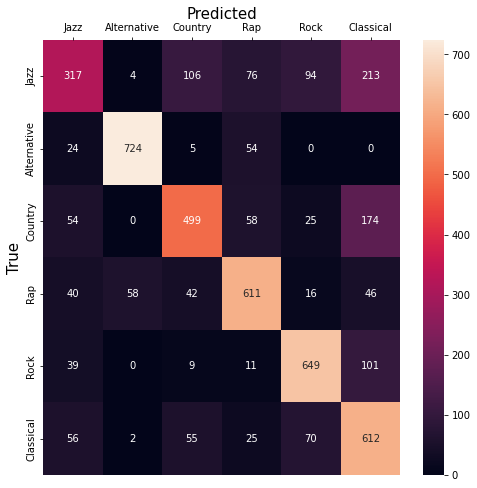

In [547]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_predict)

fig,ax= plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')

ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(list(targetLabel_map.keys()), fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(list(targetLabel_map.keys()), fontsize = 10)
plt.show()